## Transformada de Hough (detecção de retas)
***

![img](https://user-images.githubusercontent.com/14116020/54875870-52972f00-4de5-11e9-8a61-838223671ae3.png)

Para que um carro autonomo consiga desempenhar seu papel com perfeição, é preciso detectar previamente varias situações externas e saber como agir em cada uma delas, porém um dos pontos mais importantes para o bom funcionamento do automovel é a detecção da linhas que separam cada aba da pista.

Essa tarefa é facilmente implementada usando várias técnicas de visão computacional e uma dessas tarefas é a transformada de hough.

Ela consegue detectar qualquer linha por meio de algoritmos matematicos.

O objetivo é aplicar na imagem uma transformação de modo que todos os pontos pertencentes a uma mesma curva sejam mapeados num único ponto de um novo espaço de parametrização da curva procurada.

![img](https://user-images.githubusercontent.com/14116020/54875795-fed81600-4de3-11e9-8cad-f3826785ac10.png)

Etapas importante no algoritmo de Hough:

1. Obter uma imagem de borda binária usando Canny por exemplo.
2. Especificar as subdivisões no plano $\theta$p
3. Eliminar a contagem das células acumuladoras para a concentração elevadas de pixels
4. Examinar a relação (principalmente as de continuidade) entre os pixels de uma célula escolhida

```py
def HoughLinesP(img, p, o, minVal, maxVal):
    img = Imagem com a qual queremos trabalhar já binário com detecção de borda
    p = Distância perpendicular da origem até a linha
    o = Ângulo perpendicular da linha ao eixo
    minVal = Comprimento mínimo da linha
    maxVal = Comprimento máximo da linha
    
    return Imagem com bordas detectadas
```

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [2]:
img = cv.imread("./Imagens/estrada.jpg", cv.IMREAD_GRAYSCALE)

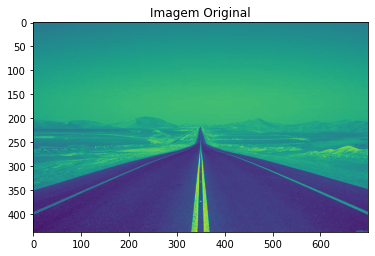

In [3]:
img_gray = cv.cvtColor(img, cv.IMREAD_GRAYSCALE)
plt.imshow(img)
plt.title("Imagem Original")
plt.show()

In [4]:
metodo = cv.THRESH_BINARY_INV + cv.THRESH_OTSU

In [5]:
limiar, img_binario = cv.threshold(img, 200, 255, metodo)

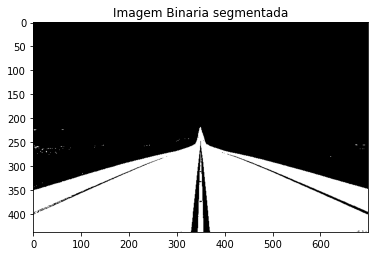

In [6]:
img_gray = cv.cvtColor(img_binario, cv.IMREAD_GRAYSCALE)
plt.imshow(img_gray)
plt.title("Imagem Binaria segmentada")
plt.show()

In [7]:
img_segmentada = cv.Canny(img_binario, 70, 255)

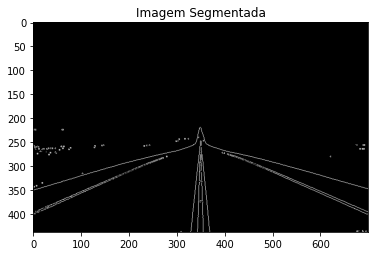

In [8]:
img_gray = cv.cvtColor(img_segmentada, cv.IMREAD_GRAYSCALE)
plt.imshow(img_gray)
plt.title("Imagem Segmentada")
plt.show()

In [9]:
lines = cv.HoughLinesP(img_segmentada, 1, np.pi/180, 10, 200)

In [10]:
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv.line(img, (x1, y1), (x2, y2), (0, 255, 0), 3)

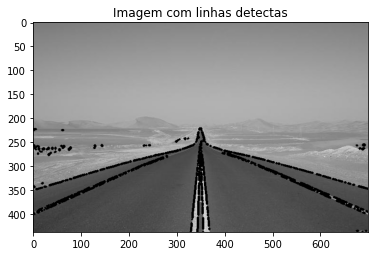

In [11]:
img_gray = cv.cvtColor(img, cv.IMREAD_GRAYSCALE)
plt.imshow(img_gray)
plt.title("Imagem com linhas detectas")
plt.show()